## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

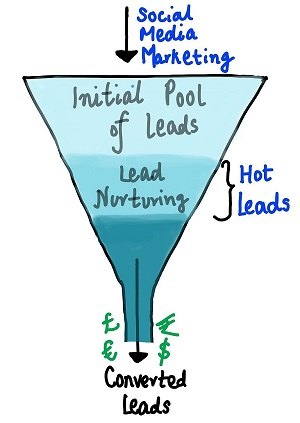

Lead Conversion Process - Demonstrated as a funnel
Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

    


## Goals of the Case Stud

There are quite a few goals for this case study:

* Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
* There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.



### Import Libraries

In [1]:
# Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Extra
import warnings
warnings.filterwarnings(action="ignore")


import time, warnings
import datetime as dt

from IPython.display import display
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv("Leads.csv")
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [3]:
#To check numbr of rows and coloumns
df.shape

(9240, 37)

In [4]:
#To check the details of data types ofcolumns and other informations.
df.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Inspect the different columsn in the dataset

df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
## finding numeric variable in the data_frame

df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [7]:
# Check the summary of the dataset
df.describe(include='all')

Prospect ID    Lead Number  \
count                                   9240    9240.000000   
unique                                  9240            NaN   
top     7927b2df-8bba-4d29-b9a2-b6e0beafe620            NaN   
freq                                       1            NaN   
mean                                     NaN  617188.435606   
std                                      NaN   23405.995698   
min                                      NaN  579533.000000   
25%                                      NaN  596484.500000   
50%                                      NaN  615479.000000   
75%                                      NaN  637387.250000   
max                                      NaN  660737.000000   

                    Lead Origin Lead Source Do Not Email Do Not Call  \
count                      9240        9204         9240        9240   
unique                        5          21            2           2   
top     Landing Page Submission      Google           No          No   
freq                       4886        2868         8506        9238   
mean                        NaN         NaN          NaN         NaN   
std                         NaN         NaN          NaN         NaN   
min                         NaN         NaN          NaN         NaN   
25%                         NaN         NaN          NaN         NaN   
50%                         NaN         NaN          NaN         NaN   
75%                         NaN         NaN          NaN         NaN   
max                         NaN         NaN          NaN         NaN   

          Converted  TotalVisits  Total Time Spent on Website  \
count   9240.000000  9103.000000                  9240.000000   
unique          NaN          NaN                          NaN   
top             NaN          NaN                          NaN   
freq            NaN          NaN                          NaN   
mean       0.385390     3.445238                   487.698268   
std        0.486714     4.854853                   548.021466   
min        0.000000     0.000000                     0.000000   
25%        0.000000     1.000000                    12.000000   
50%        0.000000     3.000000                   248.000000   
75%        1.000000     5.000000                   936.000000   
max        1.000000   251.000000                  2272.000000   

        Page Views Per Visit Last Activity Country Specialization  \
count            9103.000000          9137    6779           7802   
unique                   NaN            17      38             19   
top                      NaN  Email Opened   India         Select   
freq                     NaN          3437    6492           1942   
mean                2.362820           NaN     NaN            NaN   
std                 2.161418           NaN     NaN            NaN   
min                 0.000000           NaN     NaN            NaN   
25%                 1.000000           NaN     NaN            NaN   
50%                 2.000000           NaN     NaN            NaN   
75%                 3.000000           NaN     NaN            NaN   
max                55.000000           NaN     NaN            NaN   

       How did you hear about X Education What is your current occupation  \
count                                7033                            6550   
unique                                 10                               6   
top                                Select                      Unemployed   
freq                                 5043                            5600   
mean                                  NaN                             NaN   
std                                   NaN                             NaN   
min                                   NaN                             NaN   
25%                                   NaN                             NaN   
50%                                   NaN                             NaN   
75%                            

### Data Cleaning and Preparation

### Rename column names

* Long column names make analysis tiring as one has to always refer to column names. Also has impact on charts created later on
* Ideally, we should follow python's preferred Snakecase nomenclature

In [8]:
 ## change nomenclature to snakecase
df.columns = df.columns.str.replace(' ', '_').str.lower()

# test
df.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [9]:
# Check the number of missing values in each column

df.isnull().sum()

prospect_id                                         0
lead_number                                         0
lead_origin                                         0
lead_source                                        36
do_not_email                                        0
do_not_call                                         0
converted                                           0
totalvisits                                       137
total_time_spent_on_website                         0
page_views_per_visit                              137
last_activity                                     103
country                                          2461
specialization                                   1438
how_did_you_hear_about_x_education               2207
what_is_your_current_occupation                  2690
what_matters_most_to_you_in_choosing_a_course    2709
search                                              0
magazine                                            0
newspaper_article           

In [10]:
# Calculate percentage of null values for each column
round(((df.isnull().sum() / df.shape[0]) * 100),2)

prospect_id                                       0.00
lead_number                                       0.00
lead_origin                                       0.00
lead_source                                       0.39
do_not_email                                      0.00
do_not_call                                       0.00
converted                                         0.00
totalvisits                                       1.48
total_time_spent_on_website                       0.00
page_views_per_visit                              1.48
last_activity                                     1.11
country                                          26.63
specialization                                   15.56
how_did_you_hear_about_x_education               23.89
what_is_your_current_occupation                  29.11
what_matters_most_to_you_in_choosing_a_course    29.32
search                                            0.00
magazine                                          0.00
newspaper_

In [11]:
# Drop all the columns in which greater than 3000 missing values are present

for col in df.columns:
    if df[col].isnull().sum() > 3000:
        df.drop(col, 1, inplace=True)

In [12]:
# Check the number of null values again
df.isnull().sum()

prospect_id                                         0
lead_number                                         0
lead_origin                                         0
lead_source                                        36
do_not_email                                        0
do_not_call                                         0
converted                                           0
totalvisits                                       137
total_time_spent_on_website                         0
page_views_per_visit                              137
last_activity                                     103
country                                          2461
specialization                                   1438
how_did_you_hear_about_x_education               2207
what_is_your_current_occupation                  2690
what_matters_most_to_you_in_choosing_a_course    2709
search                                              0
magazine                                            0
newspaper_article           

In [13]:
## As you might be able to interpret, the variable contry and city won't be of any use in our analysis. So it's best that we drop it.

In [14]:
df.drop(['country','city'], axis = 1, inplace = True)

In [15]:
# Let's now check the percentage of missing values in each column

round(100*(df.isnull().sum()/len(df.index)), 2)

prospect_id                                       0.00
lead_number                                       0.00
lead_origin                                       0.00
lead_source                                       0.39
do_not_email                                      0.00
do_not_call                                       0.00
converted                                         0.00
totalvisits                                       1.48
total_time_spent_on_website                       0.00
page_views_per_visit                              1.48
last_activity                                     1.11
specialization                                   15.56
how_did_you_hear_about_x_education               23.89
what_is_your_current_occupation                  29.11
what_matters_most_to_you_in_choosing_a_course    29.32
search                                            0.00
magazine                                          0.00
newspaper_article                                 0.00
x_educatio

In [16]:
# Check the number of null values again

df.isnull().sum()    

prospect_id                                         0
lead_number                                         0
lead_origin                                         0
lead_source                                        36
do_not_email                                        0
do_not_call                                         0
converted                                           0
totalvisits                                       137
total_time_spent_on_website                         0
page_views_per_visit                              137
last_activity                                     103
specialization                                   1438
how_did_you_hear_about_x_education               2207
what_is_your_current_occupation                  2690
what_matters_most_to_you_in_choosing_a_course    2709
search                                              0
magazine                                            0
newspaper_article                                   0
x_education_forums          

Now recall that there are a few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [17]:
# Get the value counts of all the columns

for column in df:
    print(df[column].astype('category').value_counts())
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: prospect_id, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: lead_number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: lead_origin, dtype: int64
__________________

The following three columns now have the level 'Select'. Let's check them once again.

In [18]:
df['specialization'].astype('category').value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: specialization, dtype: int64

In [19]:
df['how_did_you_hear_about_x_education'].astype('category').value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: how_did_you_hear_about_x_education, dtype: int64

In [20]:
df['lead_profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: lead_profile, dtype: int64

It is clear that, levels lead_profile and how_did_you_hear_about_x_education have lot of rows which have the value select which is  ofno use to the analysis so it's best we can drop those items.

In [21]:
df.drop(['lead_profile','how_did_you_hear_about_x_education'],axis=1,inplace= True)

Also notice that when you got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include `do_not_call`, `search`, `magazine`, `newspaper_article`, `x_education_forums`, `newspaper`, ` digital_advertisement`, `through_recommendations`, `receive_more_updates_about_our_courses`, `update_me_on_supply_chain_content`, `get_updates_on_dm_content`, `i_agree_to_pay_the_amount_through_cheque`. Since practically all of the values for these variables are `No`, it's best that we drop these columns as they won't help with our analysis.

In [22]:
df.drop(['do_not_call', 'search', 'magazine','newspaper_article','x_education_forums', 'newspaper', 
            'digital_advertisement', 'through_recommendations', 'receive_more_updates_about_our_courses', 
            'update_me_on_supply_chain_content', 'get_updates_on_dm_content', 
            'i_agree_to_pay_the_amount_through_cheque'], axis = 1, inplace = True)

Also, the variable `what_matters_most_to_you_in_choosing_a_course` has the level `Better Career Prospects` `6528` times while the other two levels/items appear one and two respectively. So we should drop this column as well.

In [23]:
df['what_matters_most_to_you_in_choosing_a_course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: what_matters_most_to_you_in_choosing_a_course, dtype: int64

In [24]:
# Drop the null value rows present in the variable 'what_matters_most_to_you_in_choosing_a_course'

df.drop(['what_matters_most_to_you_in_choosing_a_course'], axis = 1, inplace=True)

In [25]:
# Check the number of null values again

df.isnull().sum()

prospect_id                                  0
lead_number                                  0
lead_origin                                  0
lead_source                                 36
do_not_email                                 0
converted                                    0
totalvisits                                137
total_time_spent_on_website                  0
page_views_per_visit                       137
last_activity                              103
specialization                            1438
what_is_your_current_occupation           2690
a_free_copy_of_mastering_the_interview       0
last_notable_activity                        0
dtype: int64

Now, there's the column ` what_is_your_current_occupation` which has a lot of null values. Now you can drop the entire row but since we have already lost so many feature variables, we choose not to drop it as it might turn out to be significant in the analysis. So let's just drop the null rows for the column ` what_is_your_current_occupation`.

In [26]:
df = df[~pd.isnull(df['what_is_your_current_occupation'])]

In [27]:
# Check the number of null values again

df.isnull().sum()

prospect_id                                 0
lead_number                                 0
lead_origin                                 0
lead_source                                36
do_not_email                                0
converted                                   0
totalvisits                               130
total_time_spent_on_website                 0
page_views_per_visit                      130
last_activity                             103
specialization                             18
what_is_your_current_occupation             0
a_free_copy_of_mastering_the_interview      0
last_notable_activity                       0
dtype: int64

Since now the number of null values present in the columns are quite small we can simply drop the rows in which these null values are present.

In [28]:
# Drop the null value rows in the column 'totalvisits'

df = df[~pd.isnull(df['totalvisits'])]

In [29]:
# Check the null values again

df.isnull().sum()

prospect_id                                0
lead_number                                0
lead_origin                                0
lead_source                               29
do_not_email                               0
converted                                  0
totalvisits                                0
total_time_spent_on_website                0
page_views_per_visit                       0
last_activity                              0
specialization                            18
what_is_your_current_occupation            0
a_free_copy_of_mastering_the_interview     0
last_notable_activity                      0
dtype: int64

In [30]:
# Drop the null values rows in the column 'lead_source' and 'specialization'

df = df[~pd.isnull(df['lead_source'])]

In [31]:
df = df[~pd.isnull(df['specialization'])]

In [32]:
# Check the number of null values again

df.isnull().sum()

prospect_id                               0
lead_number                               0
lead_origin                               0
lead_source                               0
do_not_email                              0
converted                                 0
totalvisits                               0
total_time_spent_on_website               0
page_views_per_visit                      0
last_activity                             0
specialization                            0
what_is_your_current_occupation           0
a_free_copy_of_mastering_the_interview    0
last_notable_activity                     0
dtype: int64

Now your data doesn't have any null values. Let's now check the percentage of rows that we have retained.

In [33]:
print(len(df.index))
print(len(df.index)/9240)

6373
0.6897186147186147


We still have around 69% of the rows which seems good enough.

In [34]:
# Let's look at the dataset again

df.head()

prospect_id  lead_number              lead_origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      lead_source do_not_email  converted  totalvisits  \
0      Olark Chat           No          0          0.0   
1  Organic Search           No          0          5.0   
2  Direct Traffic           No          1          2.0   
3  Direct Traffic           No          0          1.0   
4          Google           No          1          2.0   

   total_time_spent_on_website  page_views_per_visit            last_activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            specialization what_is_your_current_occupation  \
0                   Select                      Unemployed   
1                   Select                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                   Select                      Unemployed   

  a_free_copy_of_mastering_the_interview last_notable_activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

Now, clearly the variables `prospect_id` and `lead_number` won't be of any use in the analysis, so it's best that we drop these two variables.

In [35]:
df.drop(['prospect_id', 'lead_number'], 1, inplace = True)

In [36]:
df.head(50)

lead_origin     lead_source do_not_email  converted  \
0                       API      Olark Chat           No          0   
1                       API  Organic Search           No          0   
2   Landing Page Submission  Direct Traffic           No          1   
3   Landing Page Submission  Direct Traffic           No          0   
4   Landing Page Submission          Google           No          1   
6   Landing Page Submission          Google           No          1   
10  Landing Page Submission  Organic Search           No          1   
11  Landing Page Submission  Direct Traffic           No          1   
12                      API  Organic Search           No          1   
13  Landing Page Submission  Organic Search           No          0   
14  Landing Page Submission  Direct Traffic          Yes          0   
15                      API  Organic Search           No          1   
17                      API  Referral Sites           No          0   
18  Landing Page Submission          Google           No          1   
19                      API  Organic Search           No          0   
20  Landing Page Submission          Google           No          0   
21                      API          Google           No          0   
22  Landing Page Submission          Google           No          1   
23  Landing Page Submission          Google           No          0   
24                      API          Google           No          1   
25  Landing Page Submission          Google           No          1   
26  Landing Page Submission  Organic Search           No          1   
27  Landing Page Submission          Google           No          1   
28  Landing Page Submission  Direct Traffic           No          0   
29                      API          Google           No          1   
30  Landing Page Submission  Direct Traffic           No          1   
31                      API          Google           No          0   
32                      API  Referral Sites           No          0   
34  Landing Page Submission  Organic Search           No          1   
35                      API  Referral Sites           No          1   
36  Landing Page Submission          Google           No          0   
37  Landing Page Submission          Google           No          1   
38                      API          Google           No          0   
39  Landing Page Submission          Google           No          1   
40                      API  Direct Traffic           No          0   
41  Landing Page Submission  Organic Search          Yes          0   
42                      API          Google           No          0   
44  Landing Page Submission  Direct Traffic           No          0   
45  Landing Page Submission          Google           No          0   
46  Landing Page Submission  Direct Traffic           No          0   
48                      API          Google           No          0   
50                      API      Olark Chat           No          1   
51  Landing Page Submission          Google           No          0   
52  Landing Page Submission  Organic Search           No          0   
55                      API  Organic Search           No          0   
56  Landing Page Submission  Referral Sites           No          1   
57                      API  Referral Sites           No          1   
58  Landing Page Submission  Organic Search           No          0   
59  Landing Page Submission  Referral Sites           No          0   
60                      API          Google           No          0   

    totalvisits  total_time_spent_on_website  page_views_per_visit  \
0           0.0                            0                  0.00   
1           5.0                          674                  2.50   
2           2.0                         1532                  2.00   
3           1.0                          305                  1.00   
4           2.0                         1428

### EDA

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   lead_origin                             6373 non-null   object 
 1   lead_source                             6373 non-null   object 
 2   do_not_email                            6373 non-null   object 
 3   converted                               6373 non-null   int64  
 4   totalvisits                             6373 non-null   float64
 5   total_time_spent_on_website             6373 non-null   int64  
 6   page_views_per_visit                    6373 non-null   float64
 7   last_activity                           6373 non-null   object 
 8   specialization                          6373 non-null   object 
 9   what_is_your_current_occupation         6373 non-null   object 
 10  a_free_copy_of_mastering_the_interview  6373 non-null   obje

#### categoraical variable analysis

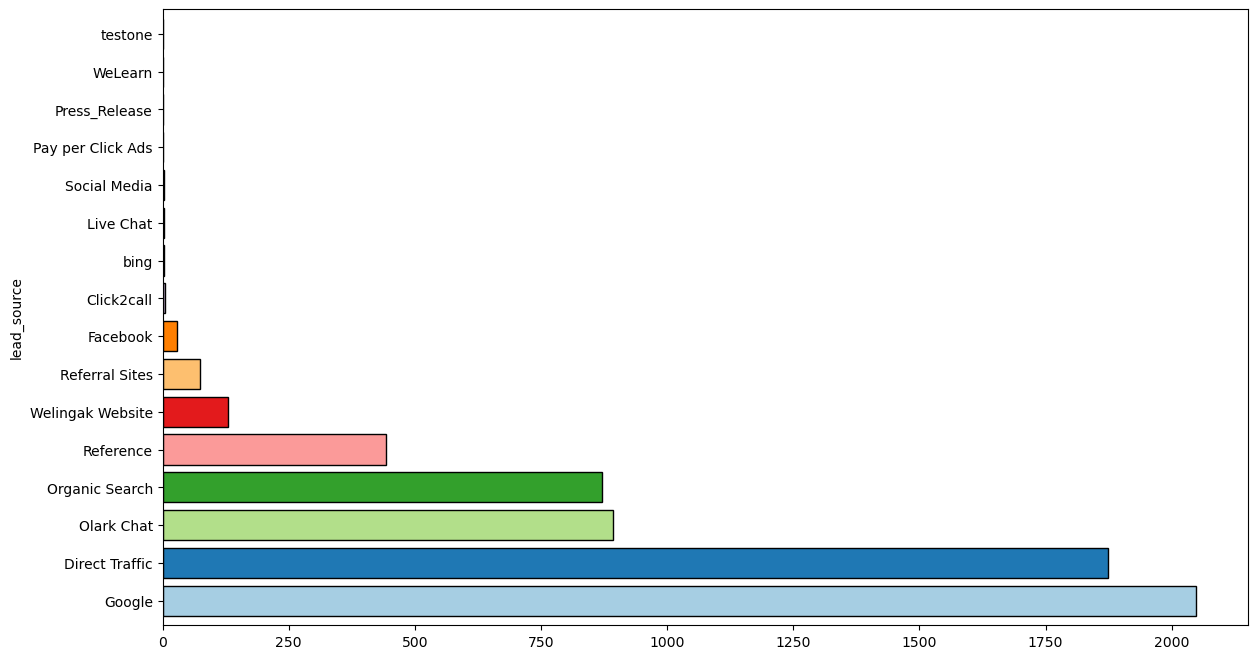

In [38]:
plt.figure(figsize = (14, 8))

df.groupby('lead_source')['converted'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Pay per Click Ads'),
  Text(9, 0, 'bing'),
  Text(10, 0, 'Social Media'),
  Text(11, 0, 'WeLearn'),
  Text(12, 0, 'Click2call'),
  Text(13, 0, 'Live Chat'),
  Text(14, 0, 'testone'),
  Text(15, 0, 'Press_Release')])

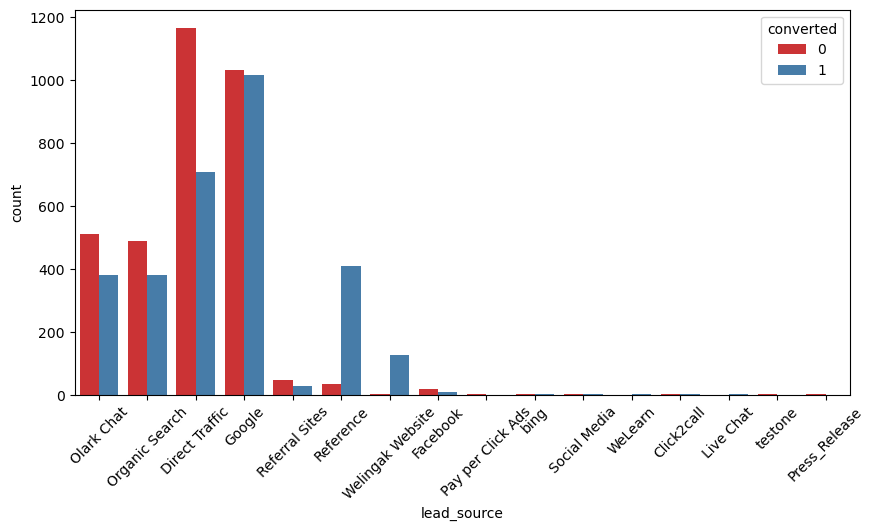

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x = "lead_source", hue = "converted", data = df,palette='Set1')
plt.xticks(rotation = 45)

### Inference
Google and Direct traffic generates maximum number of leads.
Conversion Rate of reference leads and leads through welingak website is high.
To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

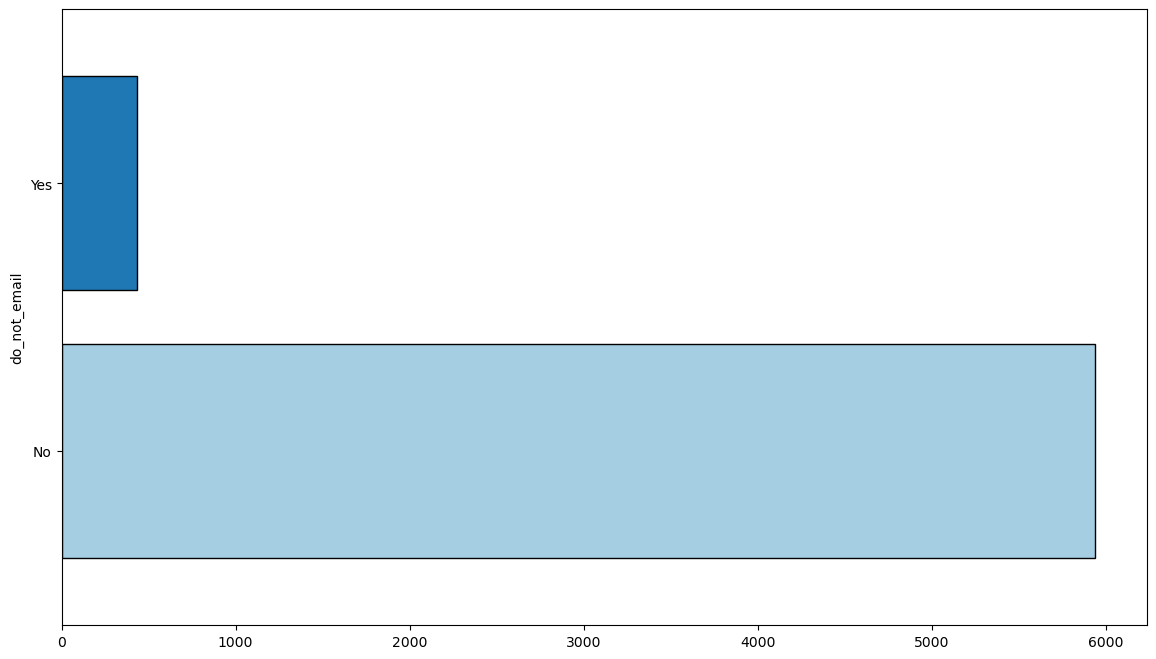

In [40]:
plt.figure(figsize = (14, 8))

df.groupby('do_not_email')['converted'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

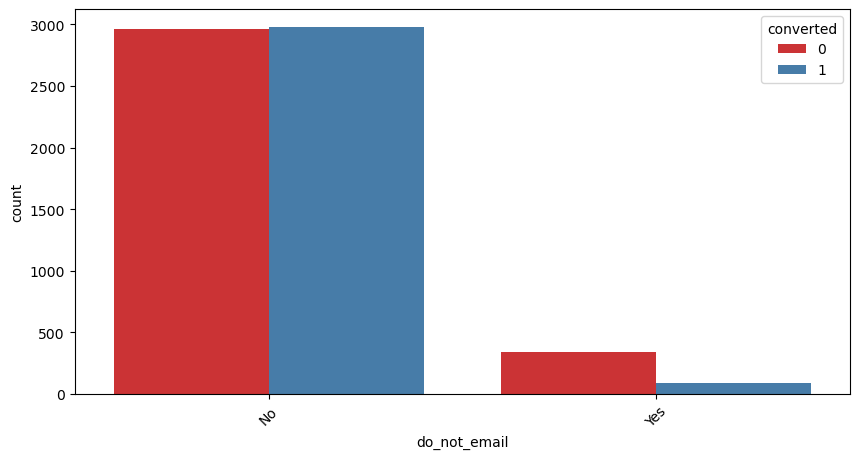

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x = "do_not_email", hue = "converted", data = df,palette='Set1')
plt.xticks(rotation = 45)

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

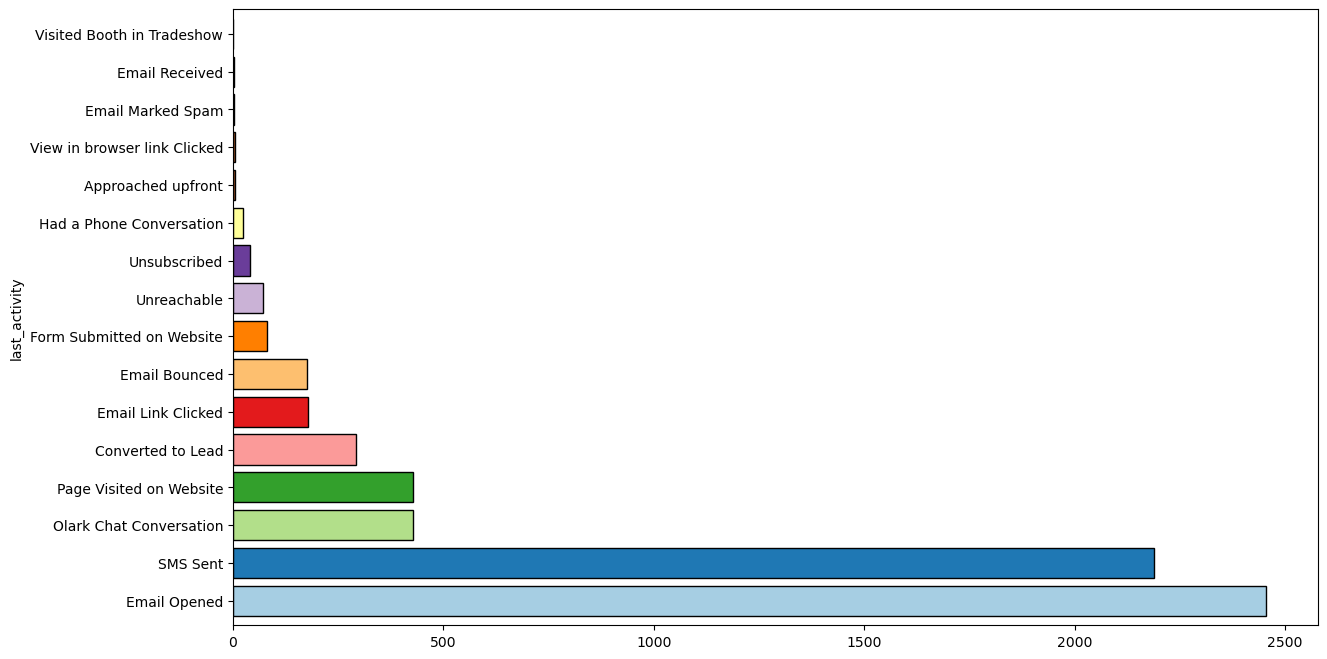

In [42]:
plt.figure(figsize = (14, 8))

df.groupby('last_activity')['converted'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Email Bounced'),
  Text(5, 0, 'Email Link Clicked'),
  Text(6, 0, 'Form Submitted on Website'),
  Text(7, 0, 'Unsubscribed'),
  Text(8, 0, 'Had a Phone Conversation'),
  Text(9, 0, 'View in browser link Clicked'),
  Text(10, 0, 'Olark Chat Conversation'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

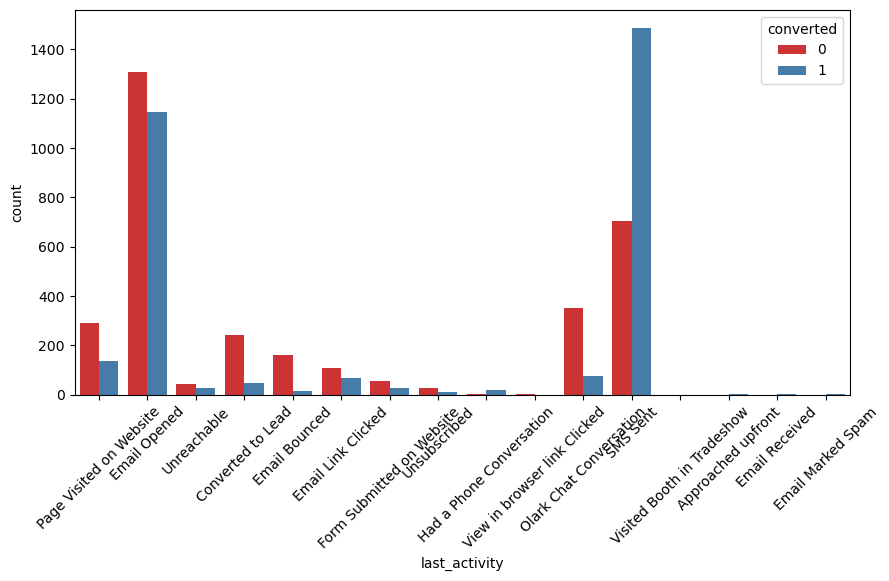

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(x = "last_activity", hue = "converted", data = df,palette='Set1')
plt.xticks(rotation = 45)

#### Inference
Those who opened Email and SMS sent along with olark chat are significant 


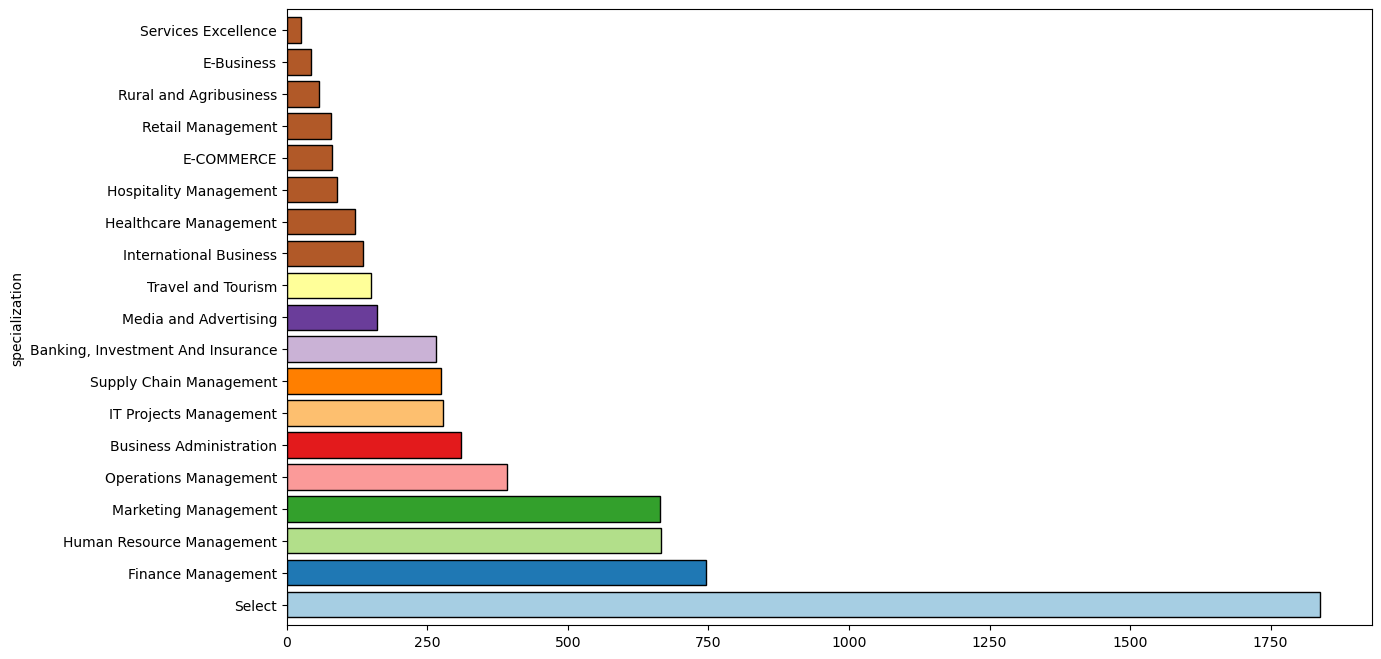

In [44]:
plt.figure(figsize = (14, 8))

df.groupby('specialization')['converted'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Select'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'Travel and Tourism'),
  Text(5, 0, 'Human Resource Management'),
  Text(6, 0, 'Marketing Management'),
  Text(7, 0, 'Banking, Investment And Insurance'),
  Text(8, 0, 'Finance Management'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'IT Projects Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

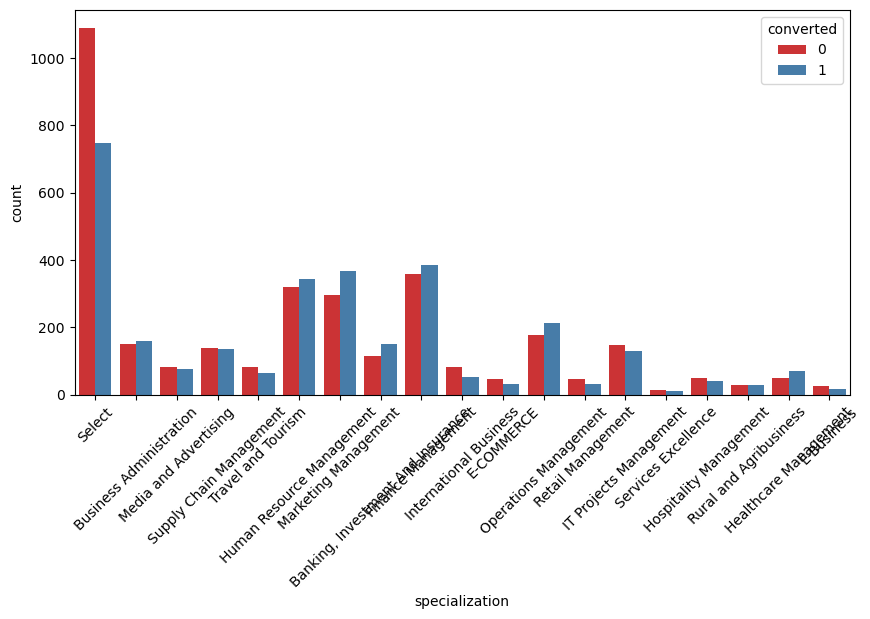

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(x = "specialization", hue = "converted", data = df,palette='Set1')
plt.xticks(rotation = 45)

#### Inference
Focus should be more on the Specialization with high conversion rate.

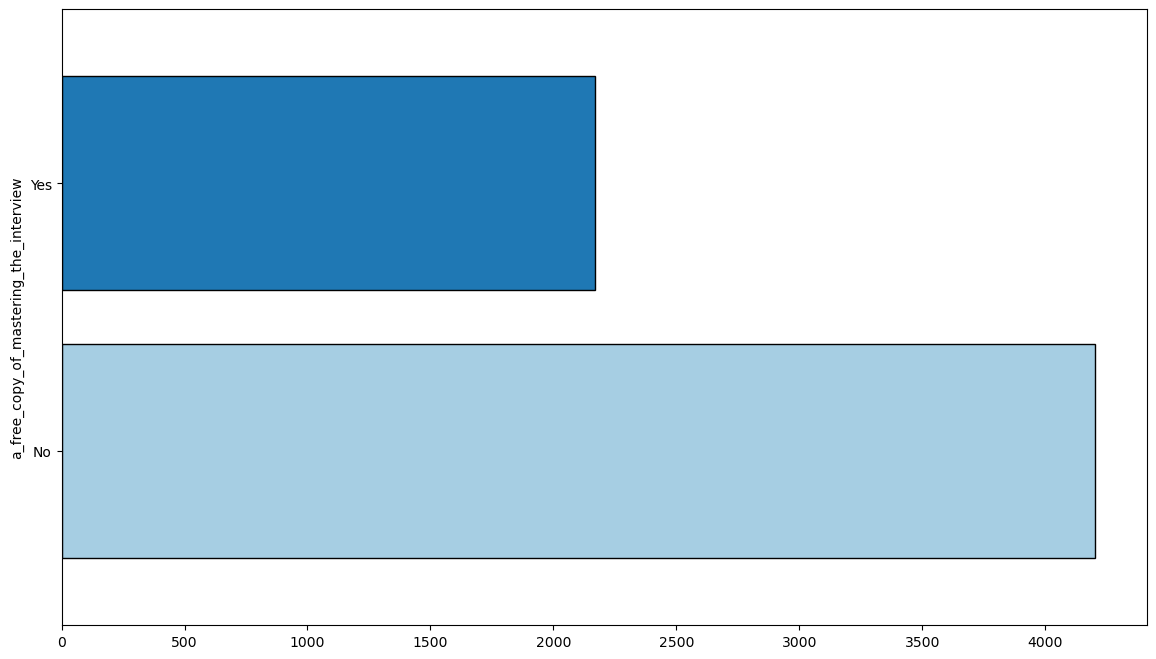

In [46]:
plt.figure(figsize = (14, 8))

df.groupby('a_free_copy_of_mastering_the_interview')['converted'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

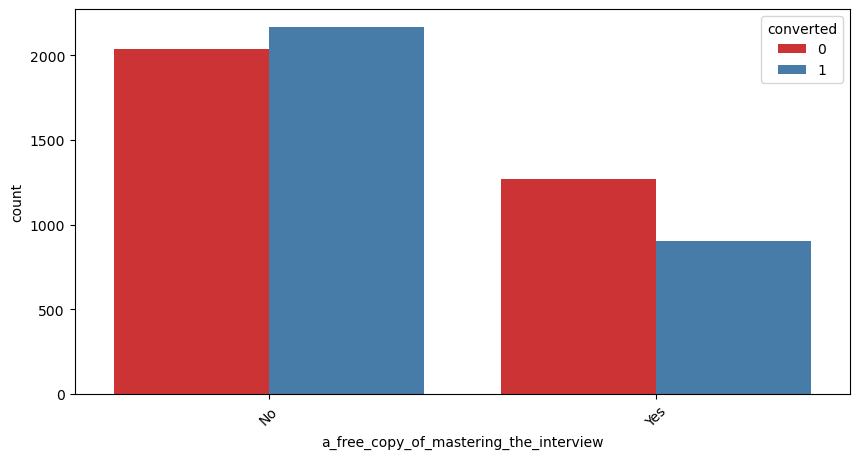

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(x = "a_free_copy_of_mastering_the_interview", hue = "converted", data = df,palette='Set1')
plt.xticks(rotation = 45)

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

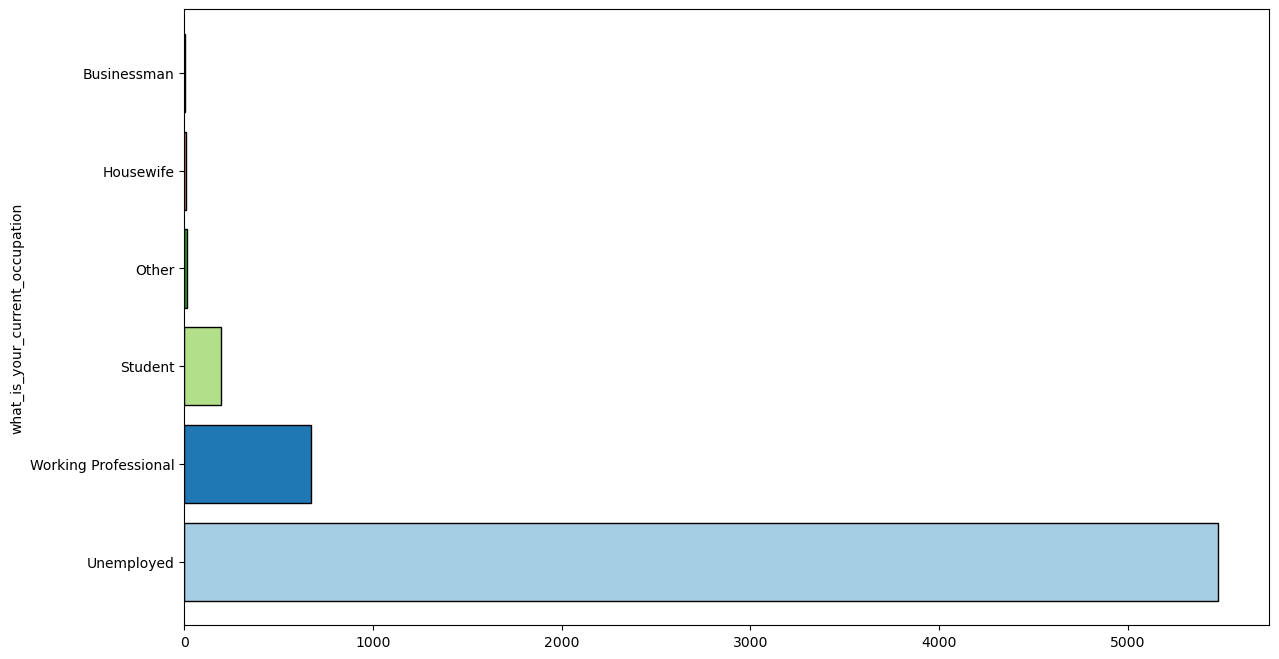

In [48]:
plt.figure(figsize = (14, 8))

df.groupby('what_is_your_current_occupation')['converted'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

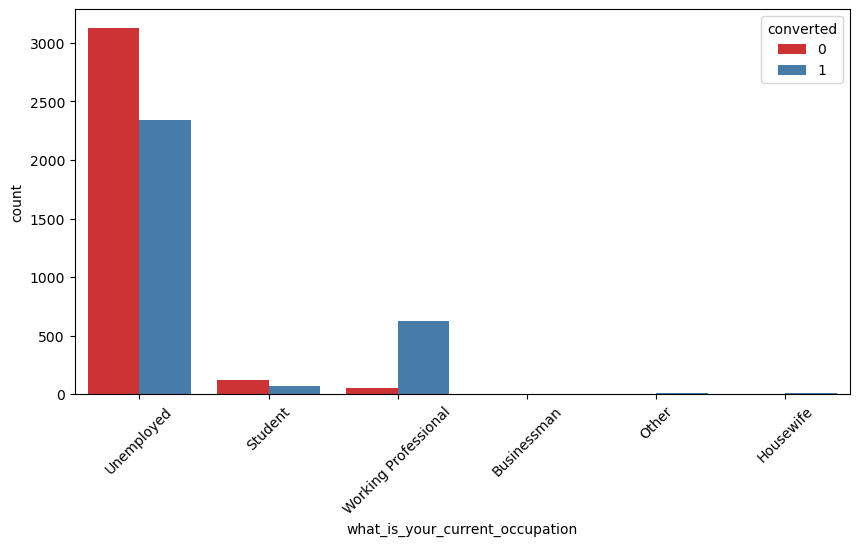

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(x = "what_is_your_current_occupation", hue = "converted", data = df,palette='Set1')
plt.xticks(rotation = 45)

#### Inference
Working Professionals going for the course have high chances of joining it.
Unemployed leads are the most in numbers but low in conversion rate.

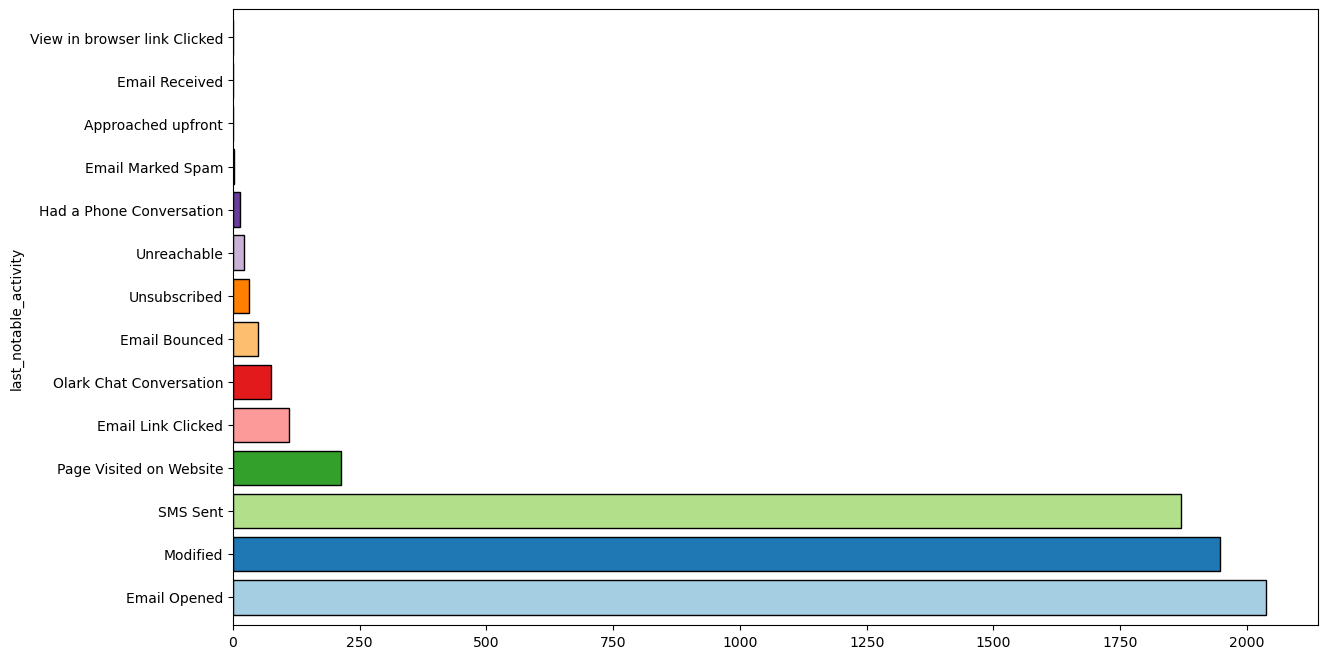

In [50]:
plt.figure(figsize = (14, 8))

df.groupby('last_notable_activity')['converted'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'View in browser link Clicked'),
  Text(12, 0, 'Email Received'),
  Text(13, 0, 'Email Marked Spam')])

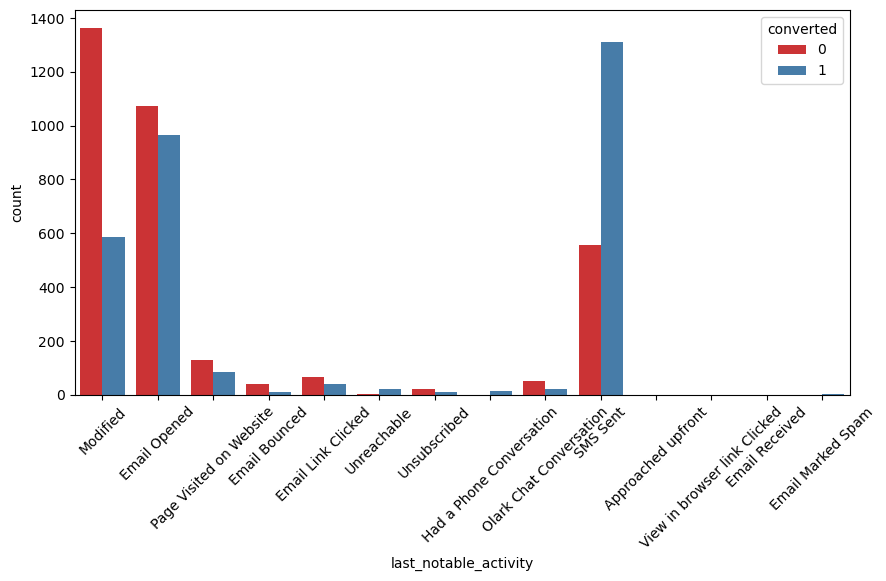

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(x = "last_notable_activity", hue = "converted", data = df,palette='Set1')
plt.xticks(rotation = 45)

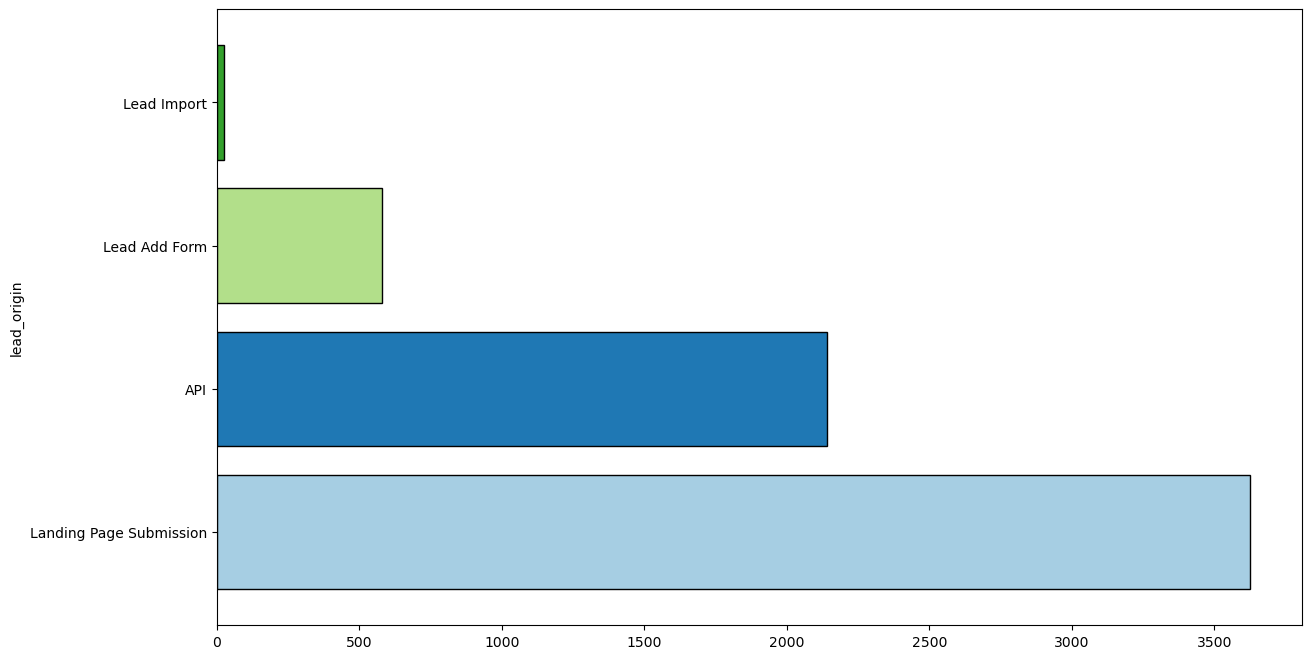

In [52]:
plt.figure(figsize = (14, 8))

df.groupby('lead_origin')['converted'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

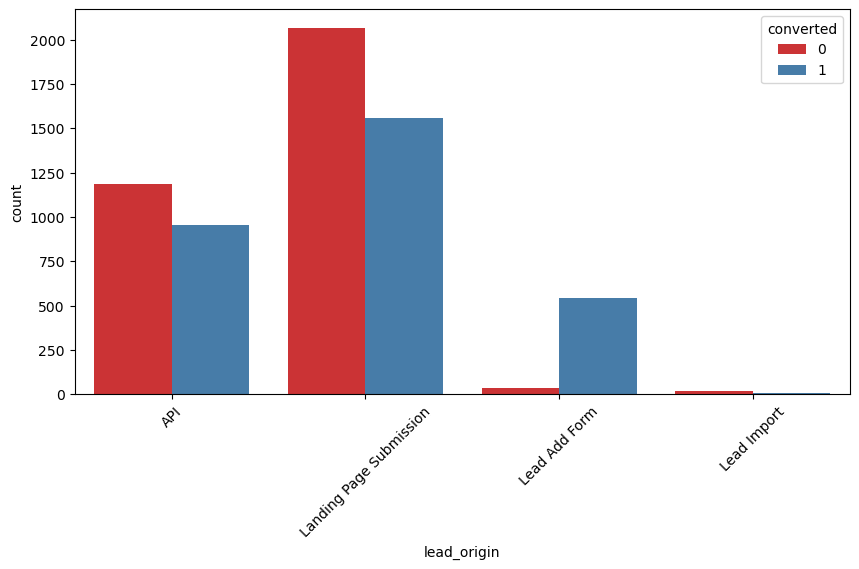

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(x = "lead_origin", hue = "converted", data = df,palette='Set1')
plt.xticks(rotation = 45)

### Inference 
Those from Lead Lead Add Form have more covertion significance than API and submission page where the covert ratio is lesser but in number.

#### Numerical Variables

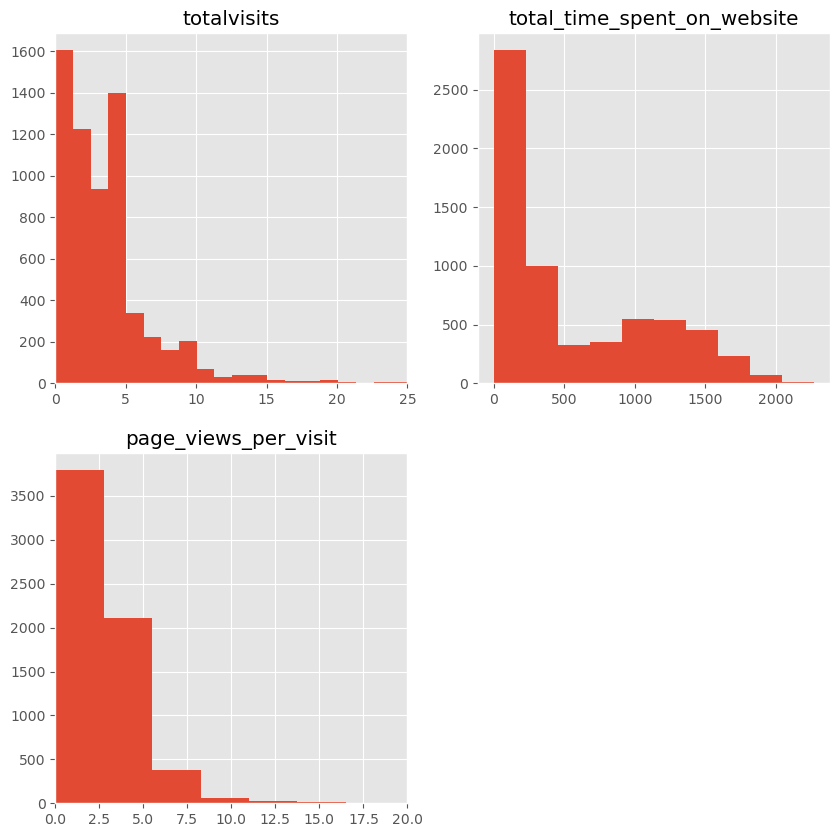

In [54]:
# Set style
plt.style.use('ggplot')
# See distribution of each of these columns

plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df['totalvisits'], bins = 200)
plt.title('totalvisits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df['total_time_spent_on_website'], bins = 10)
plt.title('total_time_spent_on_website')

plt.subplot(223)
plt.hist(df['page_views_per_visit'], bins = 20)
plt.title('page_views_per_visit')
plt.xlim(0,20)
plt.show()

### Prepare the data for modelling

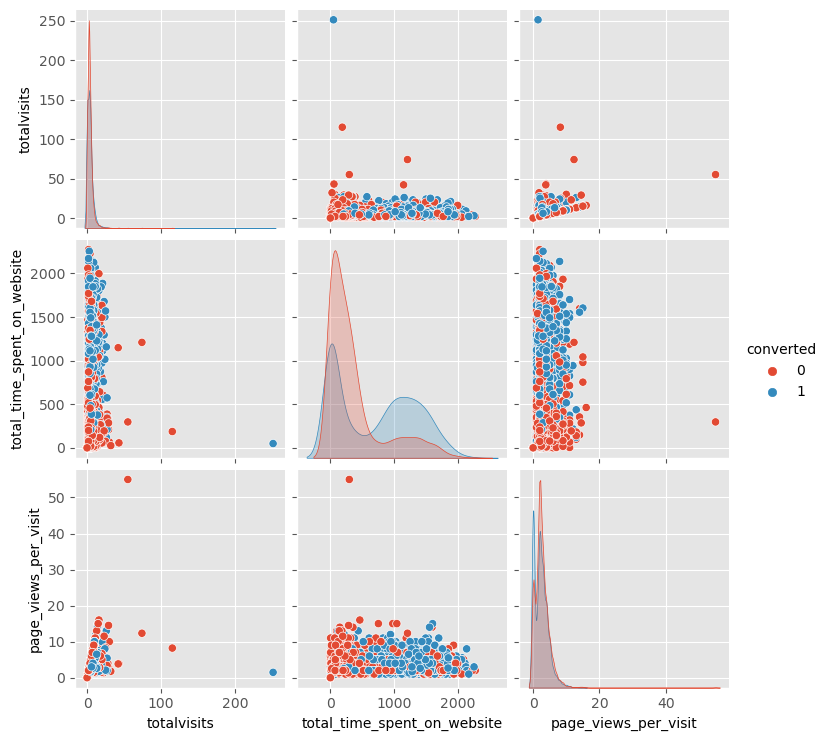

In [55]:
#Bivariate Analysis-numerical
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(df,diag_kind='kde',hue='converted')
plt.show()

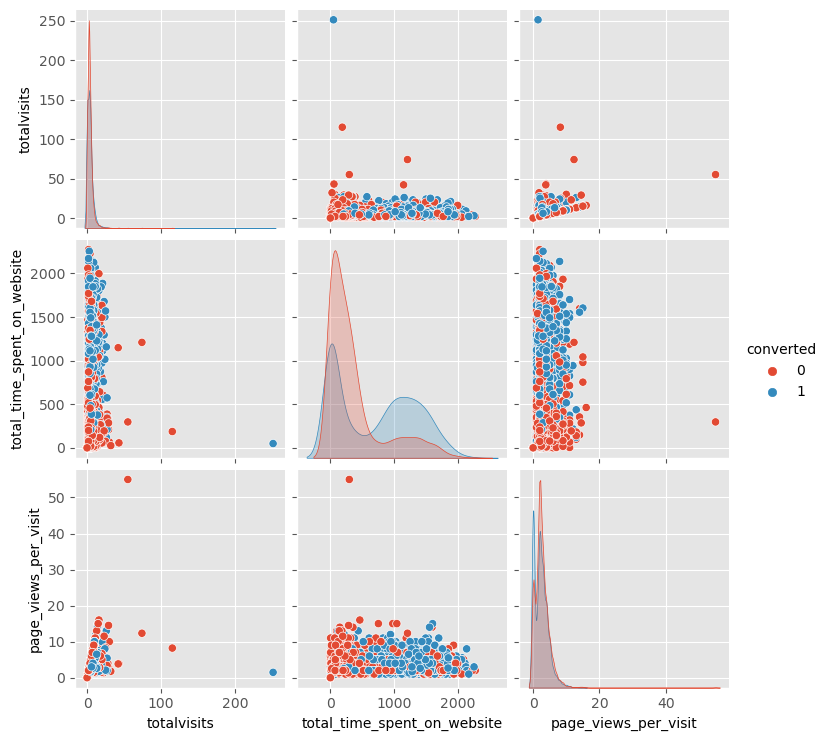

In [56]:
xedu = df[['totalvisits','total_time_spent_on_website','page_views_per_visit','converted']]
sns.pairplot(xedu,diag_kind='kde',hue='converted')
plt.show()

In [57]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedxedu = pd.DataFrame(pt.fit_transform(xedu))
transformedxedu.columns = xedu.columns
transformedxedu.head()

totalvisits  total_time_spent_on_website  page_views_per_visit  converted
0    -1.539988                    -1.532509             -1.534722  -0.962570
1     0.690854                     0.641870              0.230818  -0.962570
2    -0.219742                     1.262512             -0.019004   1.038885
3    -0.723932                     0.153656             -0.629842  -0.962570
4    -0.219742                     1.204175             -0.629842   1.038885

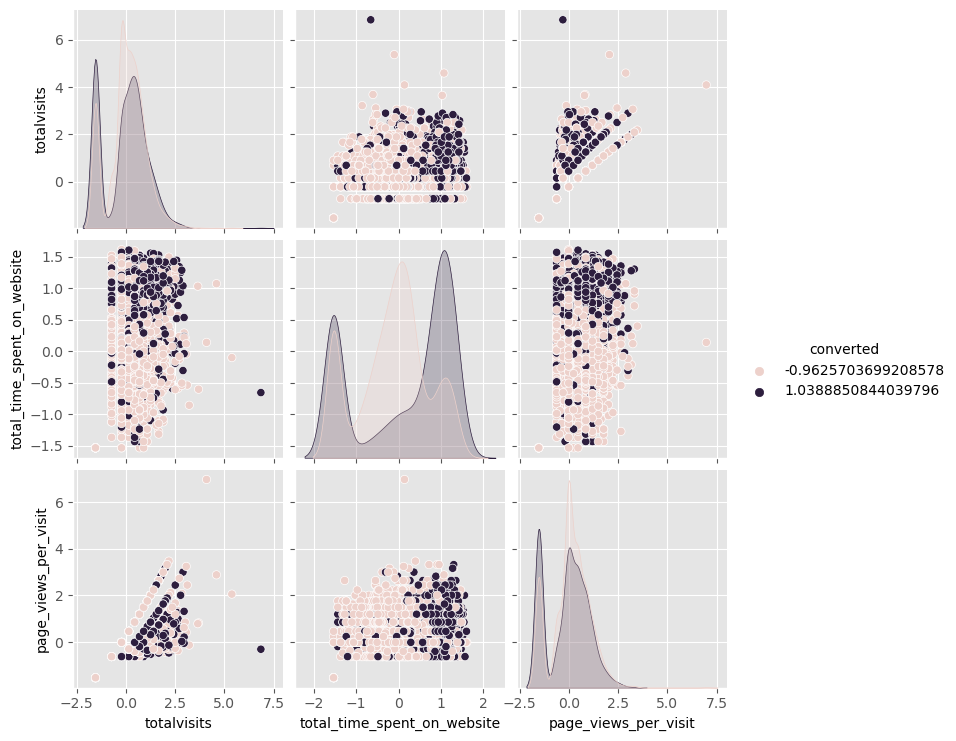

In [58]:
sns.pairplot(transformedxedu,diag_kind='kde',hue='converted')
plt.show()

<Axes: >

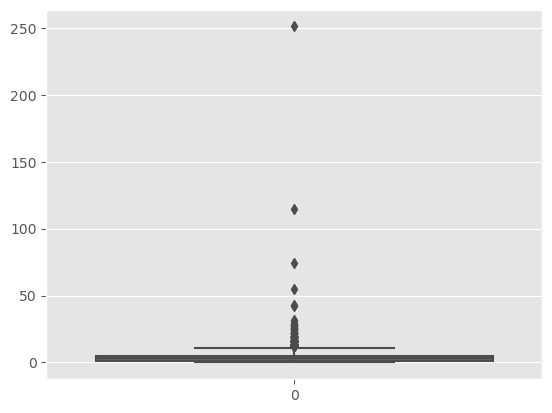

In [59]:
sns.boxplot(df['totalvisits'],orient='vert',palette='Set1')

As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [60]:
percentiles = df['totalvisits'].quantile([0.05,0.95]).values
df['totalvisits'][df['totalvisits'] <= percentiles[0]] = percentiles[0]
df['totalvisits'][df['totalvisits'] >= percentiles[1]] = percentiles[1]

<Axes: >

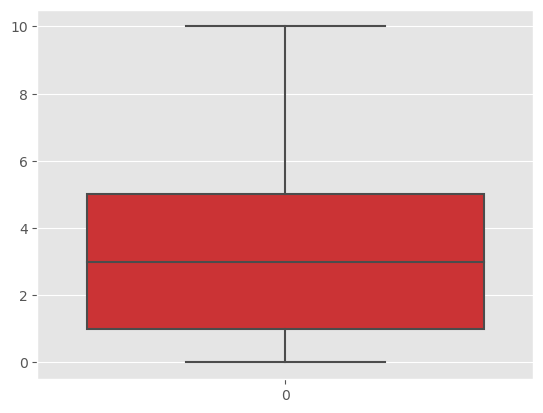

In [61]:
sns.boxplot(df['totalvisits'],orient='vert',palette='Set1')

<Axes: xlabel='converted', ylabel='totalvisits'>

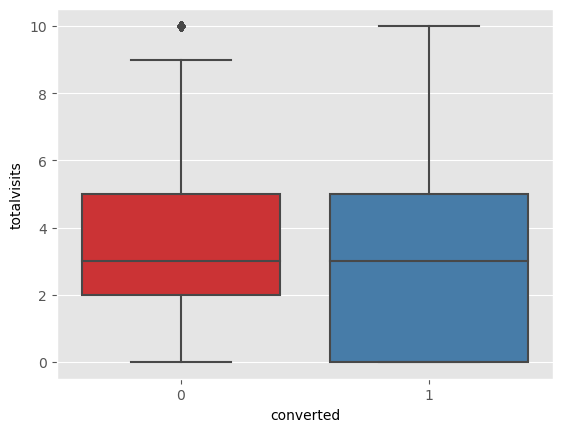

In [62]:
sns.boxplot(y = 'totalvisits', x = 'converted', data = df,palette='Set1')

### Inference
Median for converted and not converted leads are the same.
Nothing can be concluded on the basis of Total Visits.

### Total Time Spent on Website¶

In [63]:
df['total_time_spent_on_website'].describe()

count    6373.000000
mean      535.224541
std       565.374753
min         0.000000
25%        34.000000
50%       287.000000
75%      1022.000000
max      2272.000000
Name: total_time_spent_on_website, dtype: float64

<Axes: >

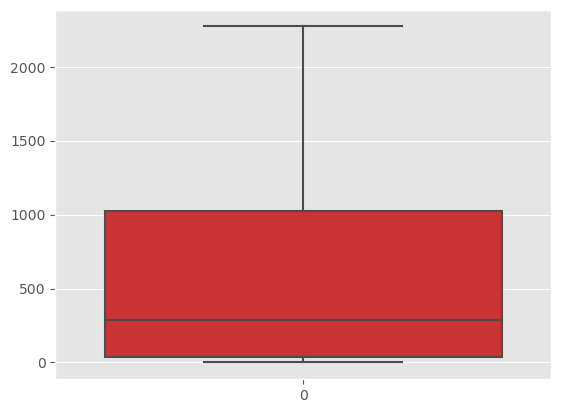

In [64]:
sns.boxplot(df['total_time_spent_on_website'],orient='vert',palette='Set1')

<Axes: xlabel='converted', ylabel='total_time_spent_on_website'>

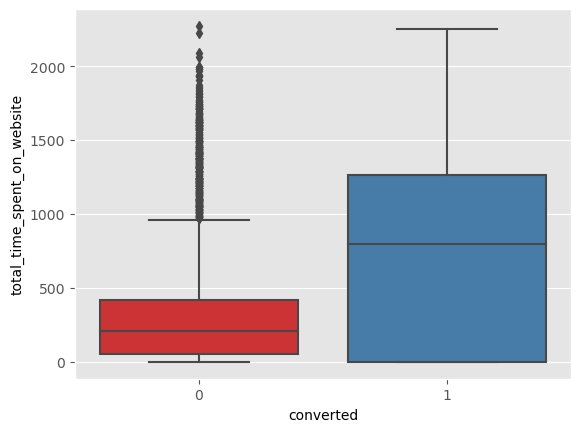

In [65]:
sns.boxplot(y = 'total_time_spent_on_website', x = 'converted', data = df,palette='Set1')

#### Inference¶
Leads spending more time on the weblise are more likely to be converted.
Website should be made more engaging to make leads spend more time.

### Page Views Per Visit

In [66]:
df['page_views_per_visit'].describe()

count    6373.000000
mean        2.480464
std         2.167364
min         0.000000
25%         1.000000
50%         2.000000
75%         3.500000
max        55.000000
Name: page_views_per_visit, dtype: float64

<Axes: >

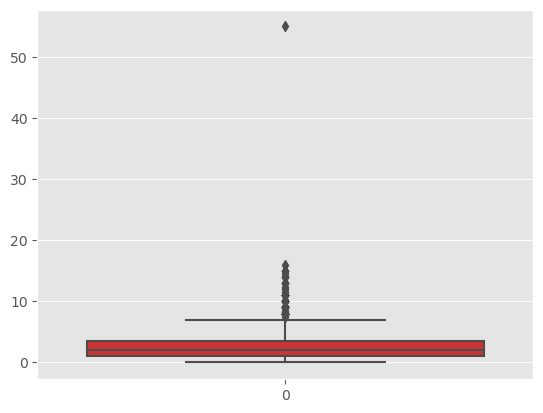

In [67]:
sns.boxplot(df['page_views_per_visit'],orient='vert',palette='Set1')

As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [68]:
percentiles = df['page_views_per_visit'].quantile([0.05,0.95]).values
df['page_views_per_visit'][df['page_views_per_visit'] <= percentiles[0]] = percentiles[0]
df['page_views_per_visit'][df['page_views_per_visit'] >= percentiles[1]] = percentiles[1]

<Axes: >

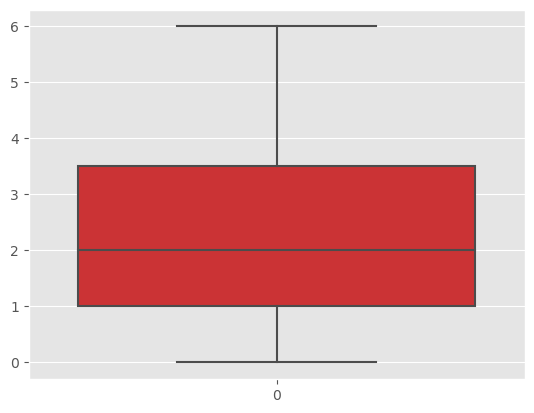

In [69]:
# Visualizing again
sns.boxplot(df['page_views_per_visit'],palette='Set1',orient='vert')

<Axes: xlabel='converted', ylabel='page_views_per_visit'>

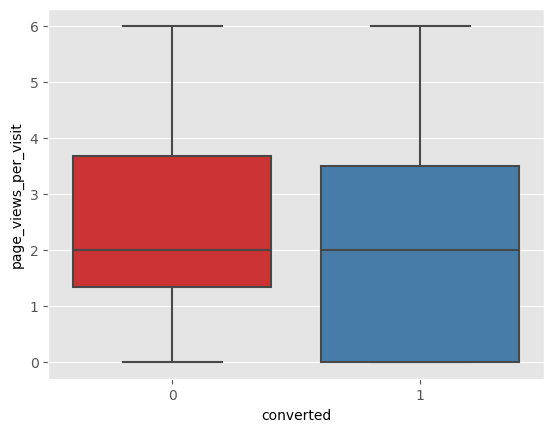

In [70]:
sns.boxplot(y = 'page_views_per_visit', x = 'converted', data =df,palette='Set1')

### Inference¶
Median for converted and unconverted leads is the same.
Nothing can be said specifically for lead conversion from Page Views Per Visit

### Dummy variable creation

The next step is to deal with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [71]:
# Check the columns which are of type 'object'

temp = df.loc[:, df.dtypes == 'object']
temp.columns

Index(['lead_origin', 'lead_source', 'do_not_email', 'last_activity',
       'specialization', 'what_is_your_current_occupation',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [72]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(df[['lead_origin', 'lead_source', 'do_not_email', 'last_activity',
                              'what_is_your_current_occupation','a_free_copy_of_mastering_the_interview','last_notable_activity'
                              ]], drop_first=True)

# Add the results to the master dataframe
df = pd.concat([df, dummy], axis=1)

In [73]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(df['specialization'], prefix = 'specialization')
dummy_spl = dummy_spl.drop(['specialization_Select'], 1)
df = pd.concat([df, dummy_spl], axis = 1)

In [74]:
# Drop the variables for which the dummy variables have been created

df = df.drop(['lead_origin', 'lead_source', 'do_not_email', 'last_activity',
                   'specialization', 'what_is_your_current_occupation',
                   'a_free_copy_of_mastering_the_interview', 'last_notable_activity'], 1)

In [75]:
# Let's take a look at the dataset again

df.head()

converted  totalvisits  total_time_spent_on_website  page_views_per_visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   lead_origin_Landing Page Submission  lead_origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   lead_origin_Lead Import  lead_source_Direct Traffic  lead_source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   lead_source_Google  lead_source_Live Chat  lead_source_Olark Chat  \
0                   0                      0                       1   
1                   0                      0                       0   
2                   0                      0                       0   
3                   0                      0                       0   
4                   1                      0                       0   

   lead_source_Organic Search  lead_source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   lead_source_Press_Release  lead_source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   lead_source_Referral Sites  lead_source_Social Media  lead_source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   lead_source_Welingak Website  lead_source_bing  lead_source_testone  \
0                             0                 0                    0   
1                             0                 0                    0   
2                             0                 0                    0   
3                             0                 0                    0   
4                             0                 0                    0   

   do_not_email_Yes  last_activity_Converted to Lead  \
0                 0                                0   
1                 0                                0   
2                 0                                0   
3                 0                                0   
4                 0                                1   

   last_activity_Email Bounced  last_activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2         

### Test-Train Split

The next step is to split the dataset into training an testing sets.

In [76]:
# Import the required library

from sklearn.model_selection import train_test_split

In [77]:
# Put all the feature variables in X

X = df.drop(['converted'], 1)
X.head()

totalvisits  total_time_spent_on_website  page_views_per_visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   lead_origin_Landing Page Submission  lead_origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   lead_origin_Lead Import  lead_source_Direct Traffic  lead_source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   lead_source_Google  lead_source_Live Chat  lead_source_Olark Chat  \
0                   0                      0                       1   
1                   0                      0                       0   
2                   0                      0                       0   
3                   0                      0                       0   
4                   1                      0                       0   

   lead_source_Organic Search  lead_source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   lead_source_Press_Release  lead_source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   lead_source_Referral Sites  lead_source_Social Media  lead_source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   lead_source_Welingak Website  lead_source_bing  lead_source_testone  \
0                             0                 0                    0   
1                             0                 0                    0   
2                             0                 0                    0   
3                             0                 0                    0   
4                             0                 0                    0   

   do_not_email_Yes  last_activity_Converted to Lead  \
0                 0                                0   
1                 0                                0   
2                 0                                0   
3                 0                                0   
4                 0                                1   

   last_activity_Email Bounced  last_activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3       

In [78]:
# Put the target variable in y

y = df['converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: converted, dtype: int64

In [79]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [80]:
## Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [81]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['totalvisits','page_views_per_visit','total_time_spent_on_website']] = scaler.fit_transform(X_train[['totalvisits','page_views_per_visit','total_time_spent_on_website']])

X_train.head()

totalvisits  total_time_spent_on_website  page_views_per_visit  \
8003          0.4                     0.029489              0.333333   
218           0.4                     0.082306              0.666667   
4171          0.6                     0.034331              1.000000   
4037          0.0                     0.000000              0.000000   
3660          0.0                     0.000000              0.000000   

      lead_origin_Landing Page Submission  lead_origin_Lead Add Form  \
8003                                    1                          0   
218                                     1                          0   
4171                                    1                          0   
4037                                    0                          0   
3660                                    0                          1   

      lead_origin_Lead Import  lead_source_Direct Traffic  \
8003                        0                           1   
218                         0                           1   
4171                        0                           1   
4037                        0                           0   
3660                        0                           0   

      lead_source_Facebook  lead_source_Google  lead_source_Live Chat  \
8003                     0                   0                      0   
218                      0                   0                      0   
4171                     0                   0                      0   
4037                     0                   0                      0   
3660                     0                   0                      0   

      lead_source_Olark Chat  lead_source_Organic Search  \
8003                       0                           0   
218                        0                           0   
4171                       0                           0   
4037                       1                           0   
3660                       0                           0   

      lead_source_Pay per Click Ads  lead_source_Press_Release  \
8003                              0                          0   
218                               0                          0   
4171                              0                          0   
4037                              0                          0   
3660                              0                          0   

      lead_source_Reference  lead_source_Referral Sites  \
8003                      0                           0   
218                       0                           0   
4171                      0                           0   
4037                      0                           0   
3660                      1                           0   

      lead_source_Social Media  lead_source_WeLearn  \
8003                         0                    0   
218                          0                    0   
4171                         0                    0   
4037                         0                    0   
3660                         0                    0   

      lead_source_Welingak Website  lead_source_bing  lead_source_testone  \
8003                             0                 0                    0   
218                              0                 0                    0   
4171                             0                 0                    0   
4037                             0                 0                    0   
3660                             0                 0                    0   

      do_not_email_Yes  last_activity_Converted to Lead  \
8003                 0                                0   
218                  0                                0   
4171                 0                                0   
4037                 0                                0   
3660                 0                                0   

      last_activity_Email Bounced  last_activity_Email Link Clicked  \
8

### Looking at the correlations

Let's now look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

In [82]:
# Looking at the correlation table
plt.figure(figsize = (80,120))
sns.heatmap(df.corr(),annot = True, cmap="YlGnBu")
plt.show()

## Model Building

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [83]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [84]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [85]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('totalvisits', True, 1),
 ('total_time_spent_on_website', True, 1),
 ('page_views_per_visit', False, 2),
 ('lead_origin_Landing Page Submission', False, 12),
 ('lead_origin_Lead Add Form', True, 1),
 ('lead_origin_Lead Import', False, 56),
 ('lead_source_Direct Traffic', False, 24),
 ('lead_source_Facebook', False, 55),
 ('lead_source_Google', False, 36),
 ('lead_source_Live Chat', False, 43),
 ('lead_source_Olark Chat', True, 1),
 ('lead_source_Organic Search', False, 34),
 ('lead_source_Pay per Click Ads', False, 41),
 ('lead_source_Press_Release', False, 53),
 ('lead_source_Reference', True, 1),
 ('lead_source_Referral Sites', False, 35),
 ('lead_source_Social Media', False, 59),
 ('lead_source_WeLearn', False, 38),
 ('lead_source_Welingak Website', True, 1),
 ('lead_source_bing', False, 33),
 ('lead_source_testone', False, 40),
 ('do_not_email_Yes', True, 1),
 ('last_activity_Converted to Lead', False, 10),
 ('last_activity_Email Bounced', False, 5),
 ('last_activity_Email Link C

In [86]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [87]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [88]:
# Import statsmodels

import statsmodels.api as sm

In [89]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2066.1
Date:                Tue, 18 Apr 2023   Deviance:                       4132.3
Time:                        15:37:23   Pearson chi2:                 4.84e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3679
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2948      0.599     -2.160      0.031      -2.469      -0.120
totalvisits                                              1.0357      0.171      6.044      0.000       0.700       1.372
total_time_spent_on_website                              4.3979      0.186     23.696      0.000       4.034       4.762
lead_origin_Lead Add Form                                3.1736      1.193      2.660      0.008       0.835       5.512
lead_source_Olark Chat                                   1.6679      0.133     12.507      0.000       1.406       1.929
lead_source_Reference                                    1.2968      1.215      1.068      0.286      -1.084       3.678
lead_source_Welingak Website                             3.4094      1.558      2.188      0.029       0.355       6.464
do_not_email_Yes                                        -1.4652      0.193     -7.597      0.000      -1.843      -1.087
last_activity_Had a Phone Conversation                   1.0343      0.986      1.049      0.294      -0.898       2.966
last_activity_SMS Sent                                   1.1814      0.082     14.330      0.000       1.020       1.343
what_is_your_current_occupation_Housewife               22.7563   2.43e+04      0.001      0.999   -4.77e+04    4.77e+04
what_is_your_current_occupation_Student                 -1.0966      0.626     -1.751      0.080      -2.324       0.131
what_is_your_current_occupation_Unemployed              -1.2776      0.590     -2.167      0.030      -2.433      -0.122
what_is_your_current_occupation_Working Professional     1.3308      0.619      2.150      0.032       0.118       2.544
last_notable_activity_Had a Phone Conversation          23.1211   2.07e+04      0.001      0.999   -4.06e+04    4.06e+04
last_notable_activity_Unreachable                        2.7754      0.809      3.430      0.001       1.189       4.361
========================================================================================================================
"""

There are quite a few variable which have a p-value greater than `0.05`. We will need to take care of them. But first, let's also look at the VIFs.

In [90]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                           lead_origin_Lead Add Form  84.31
4                               lead_source_Reference  65.19
5                        lead_source_Welingak Website  20.03
11         what_is_your_current_occupation_Unemployed   5.54
0                                         totalvisits   3.70
7              last_activity_Had a Phone Conversation   2.44
13     last_notable_activity_Had a Phone Conversation   2.43
1                         total_time_spent_on_website   2.42
12  what_is_your_current_occupation_Working Profes...   1.81
3                              lead_source_Olark Chat   1.68
8                              last_activity_SMS Sent   1.59
10            what_is_your_current_occupation_Student   1.15
6                                    do_not_email_Yes   1.09
9           what_is_your_current_occupation_Housewife   1.01
14                  last_notable_activity_Unreachable   1.01

VIFs seem to be in a decent range except for three variables. 

Let's first drop the variable `lead_source_Reference` since it has a high p-value as well as a high VIF.

In [92]:
X_train.drop('lead_source_Reference', axis = 1, inplace = True)

In [93]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2066.6
Date:                Tue, 18 Apr 2023   Deviance:                       4133.2
Time:                        15:37:24   Pearson chi2:                 4.82e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3677
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2944      0.599     -2.160      0.031      -2.469      -0.120
totalvisits                                              1.0357      0.171      6.044      0.000       0.700       1.372
total_time_spent_on_website                              4.3979      0.186     23.696      0.000       4.034       4.762
lead_origin_Lead Add Form                                4.4312      0.265     16.747      0.000       3.913       4.950
lead_source_Olark Chat                                   1.6678      0.133     12.506      0.000       1.406       1.929
lead_source_Welingak Website                             2.1518      1.037      2.075      0.038       0.120       4.184
do_not_email_Yes                                        -1.4635      0.193     -7.595      0.000      -1.841      -1.086
last_activity_Had a Phone Conversation                   1.0344      0.986      1.049      0.294      -0.898       2.966
last_activity_SMS Sent                                   1.1814      0.082     14.330      0.000       1.020       1.343
what_is_your_current_occupation_Housewife               22.7582   2.44e+04      0.001      0.999   -4.77e+04    4.78e+04
what_is_your_current_occupation_Student                 -1.0958      0.626     -1.750      0.080      -2.323       0.131
what_is_your_current_occupation_Unemployed              -1.2782      0.589     -2.168      0.030      -2.434      -0.123
what_is_your_current_occupation_Working Professional     1.3312      0.619      2.151      0.031       0.118       2.544
last_notable_activity_Had a Phone Conversation          23.1214   2.07e+04      0.001      0.999   -4.06e+04    4.06e+04
last_notable_activity_Unreachable                        2.7758      0.809      3.431      0.001       1.190       4.362
========================================================================================================================
"""

In [94]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10         what_is_your_current_occupation_Unemployed  5.54
0                                         totalvisits  3.70
6              last_activity_Had a Phone Conversation  2.44
12     last_notable_activity_Had a Phone Conversation  2.43
1                         total_time_spent_on_website  2.42
2                           lead_origin_Lead Add Form  1.90
11  what_is_your_current_occupation_Working Profes...  1.81
3                              lead_source_Olark Chat  1.68
7                              last_activity_SMS Sent  1.59
4                        lead_source_Welingak Website  1.33
9             what_is_your_current_occupation_Student  1.15
5                                    do_not_email_Yes  1.09
8           what_is_your_current_occupation_Housewife  1.01
13                  last_notable_activity_Unreachable  1.01

The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with `last_notable_activity_Had a Phone Conversation`.

In [95]:
X_train.drop('last_notable_activity_Had a Phone Conversation', axis = 1, inplace = True)

In [96]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2069.4
Date:                Tue, 18 Apr 2023   Deviance:                       4138.7
Time:                        15:37:24   Pearson chi2:                 4.82e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3669
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2968      0.599     -2.165      0.030      -2.471      -0.123
totalvisits                                              1.0430      0.171      6.093      0.000       0.707       1.378
total_time_spent_on_website                              4.3907      0.185     23.672      0.000       4.027       4.754
lead_origin_Lead Add Form                                4.4322      0.265     16.752      0.000       3.914       4.951
lead_source_Olark Chat                                   1.6687      0.133     12.515      0.000       1.407       1.930
lead_source_Welingak Website                             2.1516      1.037      2.075      0.038       0.120       4.184
do_not_email_Yes                                        -1.4633      0.193     -7.596      0.000      -1.841      -1.086
last_activity_Had a Phone Conversation                   2.7088      0.802      3.379      0.001       1.138       4.280
last_activity_SMS Sent                                   1.1813      0.082     14.333      0.000       1.020       1.343
what_is_your_current_occupation_Housewife               21.7597   1.48e+04      0.001      0.999   -2.89e+04     2.9e+04
what_is_your_current_occupation_Student                 -1.0943      0.626     -1.748      0.080      -2.321       0.132
what_is_your_current_occupation_Unemployed              -1.2766      0.589     -2.166      0.030      -2.432      -0.122
what_is_your_current_occupation_Working Professional     1.3306      0.619      2.151      0.031       0.118       2.543
last_notable_activity_Unreachable                        2.7748      0.809      3.430      0.001       1.189       4.361
========================================================================================================================
"""

Drop `What is your current occupation_Housewife`

In [97]:
X_train.drop('what_is_your_current_occupation_Housewife', axis = 1, inplace = True)

In [98]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2071.8
Date:                Tue, 18 Apr 2023   Deviance:                       4143.6
Time:                        15:37:24   Pearson chi2:                 4.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3663
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7120      0.555     -1.282      0.200      -1.800       0.376
totalvisits                                              1.0282      0.171      6.013      0.000       0.693       1.363
total_time_spent_on_website                              4.3883      0.185     23.669      0.000       4.025       4.752
lead_origin_Lead Add Form                                4.4267      0.264     16.740      0.000       3.908       4.945
lead_source_Olark Chat                                   1.6607      0.133     12.471      0.000       1.400       1.922
lead_source_Welingak Website                             2.1501      1.037      2.074      0.038       0.118       4.182
do_not_email_Yes                                        -1.4664      0.193     -7.602      0.000      -1.844      -1.088
last_activity_Had a Phone Conversation                   2.7099      0.802      3.381      0.001       1.139       4.281
last_activity_SMS Sent                                   1.1809      0.082     14.331      0.000       1.019       1.342
what_is_your_current_occupation_Student                 -1.6716      0.587     -2.849      0.004      -2.821      -0.522
what_is_your_current_occupation_Unemployed              -1.8538      0.548     -3.385      0.001      -2.927      -0.781
what_is_your_current_occupation_Working Professional     0.7530      0.579      1.301      0.193      -0.382       1.888
last_notable_activity_Unreachable                        2.7713      0.809      3.424      0.001       1.185       4.358
========================================================================================================================
"""

Drop `What is your current occupation_Working Professional`.

In [99]:
X_train.drop('what_is_your_current_occupation_Working Professional', axis = 1, inplace = True)

In [100]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.6
Date:                Tue, 18 Apr 2023   Deviance:                       4145.1
Time:                        15:37:24   Pearson chi2:                 4.79e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3660
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.0285      0.204     -0.140      0.889      -0.428       0.371
totalvisits                                    1.0212      0.171      5.974      0.000       0.686       1.356
total_time_spent_on_website                    4.3887      0.185     23.669      0.000       4.025       4.752
lead_origin_Lead Add Form                      4.4252      0.264     16.737      0.000       3.907       4.943
lead_source_Olark Chat                         1.6593      0.133     12.466      0.000       1.398       1.920
lead_source_Welingak Website                   2.1486      1.037      2.072      0.038       0.117       4.180
do_not_email_Yes                              -1.4639      0.193     -7.592      0.000      -1.842      -1.086
last_activity_Had a Phone Conversation         2.7137      0.801      3.386      0.001       1.143       4.284
last_activity_SMS Sent                         1.1844      0.082     14.391      0.000       1.023       1.346
what_is_your_current_occupation_Student       -2.3531      0.282     -8.351      0.000      -2.905      -1.801
what_is_your_current_occupation_Unemployed    -2.5359      0.186    -13.630      0.000      -2.900      -2.171
last_notable_activity_Unreachable              2.7723      0.809      3.425      0.001       1.186       4.359
==============================================================================================================
"""

All the p-values are now in the appropriate range. Let's also check the VIFs again in case we had missed something.

In [101]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9   what_is_your_current_occupation_Unemployed  3.70
0                                  totalvisits  3.03
1                  total_time_spent_on_website  2.17
7                       last_activity_SMS Sent  1.52
2                    lead_origin_Lead Add Form  1.50
3                       lead_source_Olark Chat  1.44
4                 lead_source_Welingak Website  1.31
8      what_is_your_current_occupation_Student  1.09
5                             do_not_email_Yes  1.08
6       last_activity_Had a Phone Conversation  1.01
10           last_notable_activity_Unreachable  1.01

## Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [102]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.301084
218     0.142496
4171    0.141726
4037    0.288009
3660    0.954572
207     0.203869
2044    0.161987
6411    0.951200
6498    0.070506
2085    0.982178
dtype: float64

In [103]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30108364, 0.14249648, 0.14172634, 0.28800942, 0.95457199,
       0.20386926, 0.16198681, 0.9511996 , 0.07050593, 0.98217784])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [104]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          0         0.301084
1          0         0.142496
2          1         0.141726
3          1         0.288009
4          1         0.954572

#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [105]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          0         0.301084          0
1          0         0.142496          0
2          1         0.141726          0
3          1         0.288009          0
4          1         0.954572          1

Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [106]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [107]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1920  392]
 [ 568 1581]]


In [108]:
# Predicted     not_churn    churn
# Actual
# not_churn        2543      463
# churn            692       1652  

In [109]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.784801613987895


In [110]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [111]:
# Calculate the sensitivity

TP/(TP+FN)

0.7356910190786412

In [112]:
# Calculate the specificity

TN/(TN+FP)

0.8304498269896193

### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [113]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [114]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [115]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

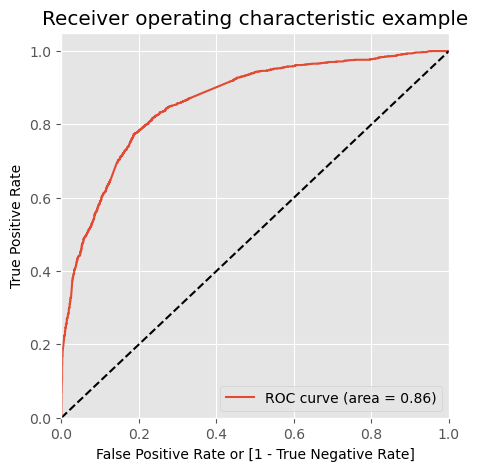

In [116]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [117]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.301084          0    1    1    1    1    0    0    0   
1          0         0.142496          0    1    1    0    0    0    0    0   
2          1         0.141726          0    1    1    0    0    0    0    0   
3          1         0.288009          0    1    1    1    0    0    0    0   
4          1         0.954572          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    1    1    1

In [118]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.540910  0.990693  0.122837
0.2   0.2  0.696032  0.949279  0.460640
0.3   0.3  0.768662  0.865519  0.678633
0.4   0.4  0.789285  0.808748  0.771194
0.5   0.5  0.784802  0.735691  0.830450
0.6   0.6  0.758126  0.622150  0.884516
0.7   0.7  0.735485  0.541647  0.915657
0.8   0.8  0.711948  0.456957  0.948962
0.9   0.9  0.646043  0.284784  0.981834


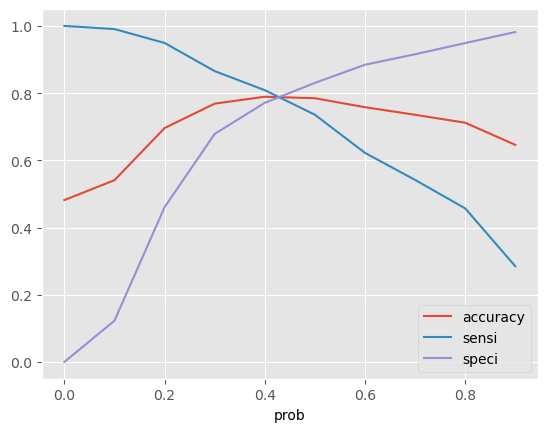

In [119]:

# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As I can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [120]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.301084          0    1    1    1    1    0    0    0   
1          0         0.142496          0    1    1    0    0    0    0    0   
2          1         0.141726          0    1    1    0    0    0    0    0   
3          1         0.288009          0    1    1    1    0    0    0    0   
4          1         0.954572          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

In [121]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.790405738623627

In [122]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.790405738623627

In [123]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1819,  493],
       [ 442, 1707]], dtype=int64)

In [124]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [125]:
# Calculate Sensitivity

TP/(TP+FN)

0.7943229409027455

In [126]:
# Calculate Specificity

TN/(TN+FP)

0.7867647058823529

This cutoff point seems good to go!

## Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [127]:
# Scale the test set as well using just 'transform'

X_test[['totalvisits', 'page_views_per_visit', 'total_time_spent_on_website']] = scaler.transform(X_test[['totalvisits', 'page_views_per_visit','total_time_spent_on_website']])

In [128]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

totalvisits  total_time_spent_on_website  lead_origin_Lead Add Form  \
4771          0.0                     0.000000                          1   
6122          0.7                     0.029049                          0   
9202          0.4                     0.416813                          0   
6570          0.3                     0.378961                          0   
2668          0.8                     0.395246                          0   

      lead_source_Olark Chat  lead_source_Reference  \
4771                       0                      1   
6122                       0                      0   
9202                       0                      0   
6570                       0                      0   
2668                       0                      0   

      lead_source_Welingak Website  do_not_email_Yes  \
4771                             0                 0   
6122                             0                 0   
9202                             0                 0   
6570                             0                 1   
2668                             0                 0   

      last_activity_Had a Phone Conversation  last_activity_SMS Sent  \
4771                                       0                       1   
6122                                       0                       0   
9202                                       0                       1   
6570                                       0                       1   
2668                                       0                       1   

      what_is_your_current_occupation_Housewife  \
4771                                          0   
6122                                          0   
9202                                          0   
6570                                          0   
2668                                          0   

      what_is_your_current_occupation_Student  \
4771                                        0   
6122                                        0   
9202                                        0   
6570                                        0   
2668                                        0   

      what_is_your_current_occupation_Unemployed  \
4771                                           0   
6122                                           1   
9202                                           1   
6570                                           1   
2668                                           1   

      what_is_your_current_occupation_Working Professional  \
4771                                                  1      
6122                                                  0      
9202                                                  0      
6570                                                  0      
2668                                                  0      

      last_notable_activity_Had a Phone Conversation  \
4771                                               0   
6122                                               0   
9202                                               0   
6570                                               0   
2668                                               0   

      last_notable_activity_Unreachable  
4771                                  0  
6122                                  0  
9202                                  0  
6570                                  0  
2668                                  0

In [129]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [130]:
# Check X_test_sm

X_test_sm

const  totalvisits  total_time_spent_on_website  \
4771    1.0          0.0                     0.000000   
6122    1.0          0.7                     0.029049   
9202    1.0          0.4                     0.416813   
6570    1.0          0.3                     0.378961   
2668    1.0          0.8                     0.395246   
...     ...          ...                          ...   
5828    1.0          0.3                     0.027289   
6583    1.0          0.3                     0.152289   
5531    1.0          1.0                     0.702025   
3056    1.0          0.3                     0.417694   
4088    1.0          0.5                     0.530370   

      lead_origin_Lead Add Form  lead_source_Olark Chat  \
4771                          1                       0   
6122                          0                       0   
9202                          0                       0   
6570                          0                       0   
2668                          0                       0   
...                         ...                     ...   
5828                          0                       0   
6583                          0                       0   
5531                          0                       0   
3056                          0                       0   
4088                          0                       0   

      lead_source_Reference  lead_source_Welingak Website  do_not_email_Yes  \
4771                      1                             0                 0   
6122                      0                             0                 0   
9202                      0                             0                 0   
6570                      0                             0                 1   
2668                      0                             0                 0   
...                     ...                           ...               ...   
5828                      0                             0                 0   
6583                      0                             0                 0   
5531                      0                             0                 0   
3056                      0                             0                 1   
4088                      0                             0                 0   

      last_activity_Had a Phone Conversation  last_activity_SMS Sent  \
4771                                       0                       1   
6122                                       0                       0   
9202                                       0                       1   
6570                                       0                       1   
2668                                       0                       1   
...                                      ...                     ...   
5828                                       0                       1   
6583                                       0                       1   
5531                                       0                       0   
3056                                       0                       1   
4088                                       0                       0   

      what_is_your_current_occupation_Housewife  \
4771                                          0   
6122                                          0   
9202                                          0   
6570                                          0   
2668                                          0   
...                                         ...   
5828                                          0   
6583                                          0   
5531                                          0   
3056                                          0   
4088                                          0   

      what_is_your_current_occupation_Student  \
4771                                        0   
6122                                        0   
9202                                  

In [131]:
# Drop the required columns from X_test as well

X_test.drop(['lead_source_Reference', 'what_is_your_current_occupation_Housewife', 
             'what_is_your_current_occupation_Working Professional', 'last_notable_activity_Had a Phone Conversation'], 1, inplace = True)

In [132]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [133]:
y_test_pred[:10]

4771    0.996245
6122    0.151602
9202    0.702178
6570    0.294331
2668    0.763416
4233    0.794334
3368    0.675751
9091    0.534813
5972    0.261038
3631    0.794129
dtype: float64

In [134]:
y_test_pred[:10]

4771    0.996245
6122    0.151602
9202    0.702178
6570    0.294331
2668    0.763416
4233    0.794334
3368    0.675751
9091    0.534813
5972    0.261038
3631    0.794129
dtype: float64

In [135]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [136]:
# Let's see the head

y_pred_1.head()

0
4771  0.996245
6122  0.151602
9202  0.702178
6570  0.294331
2668  0.763416

In [137]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [138]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [139]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [140]:
# Check 'y_pred_final'

y_pred_final.head()

converted         0
0          1  0.996245
1          0  0.151602
2          0  0.702178
3          1  0.294331
4          1  0.763416

In [141]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [142]:
# Let's see the head of y_pred_final

y_pred_final.head()

converted  Conversion_Prob
0          1         0.996245
1          0         0.151602
2          0         0.702178
3          1         0.294331
4          1         0.763416

In [143]:
# Make predictions on the test set using 0.42 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [144]:
# Check y_pred_final

y_pred_final.head()

converted  Conversion_Prob  final_predicted
0          1         0.996245                1
1          0         0.151602                0
2          0         0.702178                1
3          1         0.294331                0
4          1         0.763416                1

In [145]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['converted'], y_pred_final.final_predicted)

0.7876569037656904

In [146]:
confusion2 = metrics.confusion_matrix(y_pred_final['converted'], y_pred_final.final_predicted )
confusion2

array([[784, 212],
       [194, 722]], dtype=int64)

In [147]:
# Calculate sensitivity
TP / float(TP+FN)

0.7943229409027455

In [148]:
# Calculate specificity
TN / float(TN+FP)

0.7867647058823529

## Precision-Recall View

Let's now also build the training model using the precision-recall view

In [149]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1920,  392],
       [ 568, 1581]], dtype=int64)

##### Precision
TP / TP + FP

In [150]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.801317790167258

##### Recall
TP / TP + FN

In [151]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7356910190786412

### Precision and recall tradeoff

In [152]:
from sklearn.metrics import precision_recall_curve

In [153]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

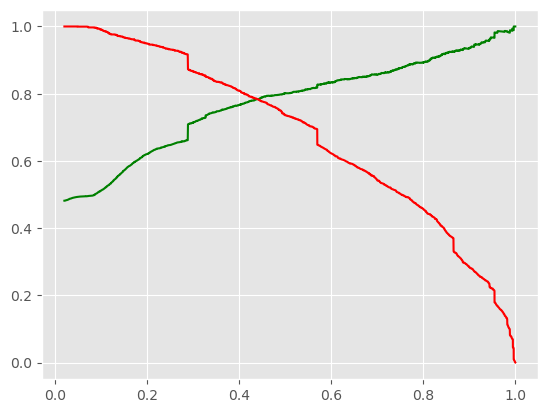

In [154]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [155]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.301084          0    1    1    1    1    0    0    0   
1          0         0.142496          0    1    1    0    0    0    0    0   
2          1         0.141726          0    1    1    0    0    0    0    0   
3          1         0.288009          0    1    1    1    0    0    0    0   
4          1         0.954572          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

In [156]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7917507285362027

In [157]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1848,  464],
       [ 465, 1684]], dtype=int64)

In [158]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [159]:
# Calculate Precision

TP/(TP+FP)

0.7839851024208566

In [160]:
# Calculate Recall

TP/(TP+FN)

0.783620288506282

This cutoff point seems good!

### Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [161]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [162]:
y_test_pred[:10]

4771    0.996245
6122    0.151602
9202    0.702178
6570    0.294331
2668    0.763416
4233    0.794334
3368    0.675751
9091    0.534813
5972    0.261038
3631    0.794129
dtype: float64

In [163]:
### Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [164]:
# Let's see the head

y_pred_1.head()

0
4771  0.996245
6122  0.151602
9202  0.702178
6570  0.294331
2668  0.763416

In [165]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [166]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [167]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [168]:
# Check 'y_pred_final'

y_pred_final.head()

converted         0
0          1  0.996245
1          0  0.151602
2          0  0.702178
3          1  0.294331
4          1  0.763416

In [169]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [170]:
# Let's see the head of y_pred_final

y_pred_final.head()

converted  Conversion_Prob
0          1         0.996245
1          0         0.151602
2          0         0.702178
3          1         0.294331
4          1         0.763416

In [171]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [172]:
# Check y_pred_final

y_pred_final.head()

converted  Conversion_Prob  final_predicted
0          1         0.996245                1
1          0         0.151602                0
2          0         0.702178                1
3          1         0.294331                0
4          1         0.763416                1

In [173]:
# Check y_pred_final

y_pred_final.head()

converted  Conversion_Prob  final_predicted
0          1         0.996245                1
1          0         0.151602                0
2          0         0.702178                1
3          1         0.294331                0
4          1         0.763416                1

In [174]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['converted'], y_pred_final.final_predicted)

0.7845188284518828

In [175]:
confusion2 = metrics.confusion_matrix(y_pred_final['converted'], y_pred_final.final_predicted )
confusion2

array([[794, 202],
       [210, 706]], dtype=int64)

In [176]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [177]:
# Calculate Precision

TP/(TP+FP)

0.7775330396475771

In [178]:
# Calculate Recall

TP/(TP+FN)

0.7707423580786026

## Summary

There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc.) in order to get a higher lead conversion.
First, sort out the best prospects from the leads you have generated. 'TotalVisits' , 'Total Time Spent on Website' , 'Page Views Per Visit' which contribute most towards the probability of a lead getting converted.
Then, You must keep a list of leads handy so that you can inform them about new courses, services, job offers and future higher studies. Monitor each lead carefully so that you can tailor the information you send to them. Carefully provide job offerings, information or courses that suits best according to the interest of the leads. A proper plan to chart the needs of each lead will go a long way to capture the leads as prospects.
Focus on converted leads. Hold question-answer sessions with leads to extract the right information you need about them. Make further inquiries and appointments with the leads to determine their intention and mentality to join online courses. 